# Assignment - Decision trees
Mikko Kettunen<br>
Last edited: 05.03.2020<br>
Mathematics and Methods in Machine Learning and Neural Networks<br>

# Background
The aim of this notebook is to create a decision tree model, that decides if a website is phishing or not, based on it's information
<br>
<br>

## Instructions for deciding if website is phishing or not
<br>
<br>
If the website has a SSL certificate, then the website is probably not phishing

#### If the website does not have a SSL certificate, then:

If some of the anchor elements is connected to another domain then the website is probably phishing.

#### If some of the anchor elements is not connected to another domain, then:

If the website has separated prefixes or suffixes by (-) then the website is probably phishing.

Otherwise the website is probably not fishing.


## Code of the decision tree

In [27]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from IPython.display import IFrame

import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

# read data (replace with your own path)
df = pd.read_csv('phishing.csv', sep=';')

# drop rows with missing values
df.dropna(axis=0, how='any', inplace=True)
df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [28]:
df['Result'] = df['Result'].astype(pd.api.types.CategoricalDtype(ordered=False))

# save column headings into a list
colnames = df.columns.get_values()
colnames

C:\Users\mikko\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.


array(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWindow', 'Iframe', 'age_of_domain',
       'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index',
       'Links_pointing_to_page', 'Statistical_report', 'Result'],
      dtype=object)

In [29]:
# Define inputs
X = df.iloc[:, :30]

# Define output
Y = df.iloc[:, 30]

In [30]:
# Construct decision tree classification
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

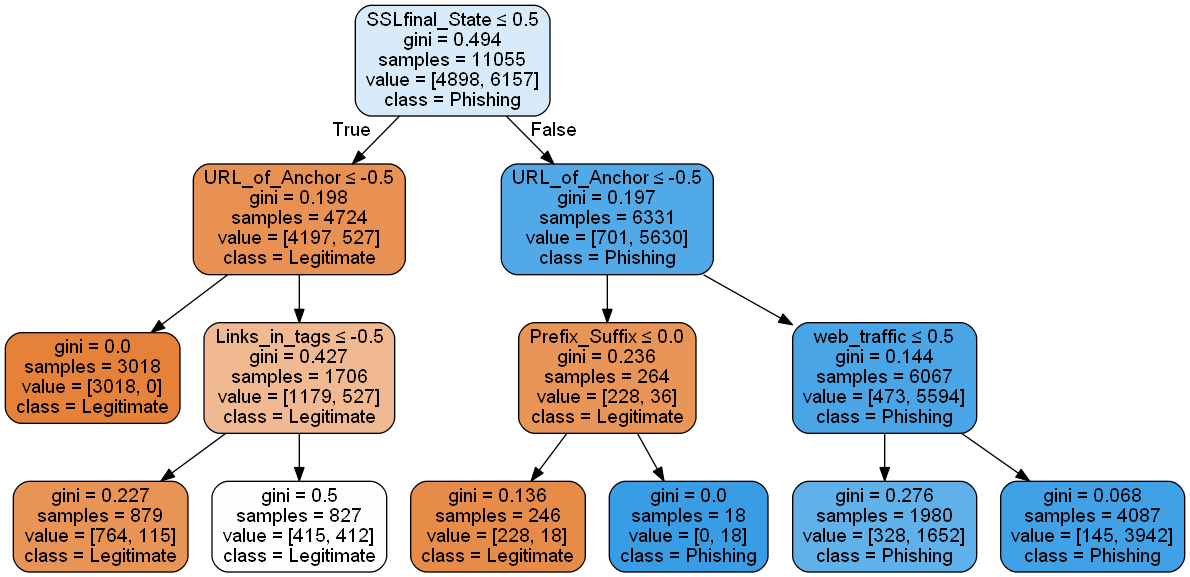

In [31]:
# Visual representation of the decision tree
dot_data = StringIO()
tree.export_graphviz(classifier, 
 out_file=dot_data, 
 class_names=['Legitimate','Phishing'], # Define result names
 feature_names=colnames[:30], # Define feature names
 filled=True, # Fill in the boxes with colours
 rounded=True, # Round the corners of the boxes
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [32]:
# predict
Y_pred = classifier.predict(X)

# output confusion matrix
cm = confusion_matrix(Y, Y_pred)
print("Confusion matrix:\n",cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("Accuracy calculated from the training set = %.3f" % (accuracy))

print(classification_report(Y, Y_pred, target_names=['no', 'yes']))

Confusion matrix:
 [[4425  473]
 [ 545 5612]]
Accuracy calculated from the training set = 0.908
              precision    recall  f1-score   support

          no       0.89      0.90      0.90      4898
         yes       0.92      0.91      0.92      6157

    accuracy                           0.91     11055
   macro avg       0.91      0.91      0.91     11055
weighted avg       0.91      0.91      0.91     11055



In [33]:
# cross-validate and print the accuracy
k = 10 # number of folds
scores = cross_val_score(estimator=classifier,
                        X=X,
                        y=Y,
                        scoring="accuracy",
                        cv=k)
print("Accuracies from %d individual folds:" % k)
print(scores)
print("Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

Accuracies from 10 individual folds:
[0.88607595 0.88698011 0.90506329 0.89783002 0.90777577 0.92224231
 0.90506329 0.90135747 0.91394928 0.91485507]
Accuracy calculated using 10-fold cross validation = 0.904


In [39]:
#Experiment with min_samples_leaf to find the best model, the best was with a value of 1

for leaf in range(101,-1,-20):
    print("min_samples_leaf: %d" % leaf)
    classifier = tree.DecisionTreeClassifier(min_samples_leaf=leaf)
    classifier.fit(X,Y)
    Y_pred = classifier.predict(X)
    cm = confusion_matrix(Y, Y_pred)
    accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
    print("  Accuracy calculated from the training set = %.3f" % (accuracy))
    
    scores = cross_val_score(estimator=classifier,
                        X=X,
                        y=Y,
                        scoring="accuracy",
                        cv=k)
    print("  Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))
    
#Experiment with min_samples_split to find the best model, the best was with a value of 2
    
for split in range(20,-1,-3):
    print("min_samples_split: %d" % split)
    classifier = tree.DecisionTreeClassifier(min_samples_split=split)
    classifier.fit(X,Y)
    Y_pred = classifier.predict(X)
    cm = confusion_matrix(Y, Y_pred)
    accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
    print("  Accuracy calculated from the training set = %.3f" % (accuracy))
    
    scores = cross_val_score(estimator=classifier,
                        X=X,
                        y=Y,
                        scoring="accuracy",
                        cv=k)
    print("  Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

# Experiment with max_depth to find the best model, for increasing the accuracy significally,
# the decision tree would have been too complicated, so we decided to just use the value 3, because
# it had over 90% accuracy and the same time was really simple

for depth in range(11,-1,-2):
    print("max_depth: %d" % depth)
    classifier = tree.DecisionTreeClassifier(max_depth=depth)
    classifier.fit(X,Y)
    Y_pred = classifier.predict(X)
    cm = confusion_matrix(Y, Y_pred)
    accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
    print("  Accuracy calculated from the training set = %.3f" % (accuracy))
    
    scores = cross_val_score(estimator=classifier,
                        X=X,
                        y=Y,
                        scoring="accuracy",
                        cv=k)
    print("  Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))    

min_samples_leaf: 101
  Accuracy calculated from the training set = 0.929
  Accuracy calculated using 10-fold cross validation = 0.923
min_samples_leaf: 81
  Accuracy calculated from the training set = 0.930
  Accuracy calculated using 10-fold cross validation = 0.924
min_samples_leaf: 61
  Accuracy calculated from the training set = 0.936
  Accuracy calculated using 10-fold cross validation = 0.929
min_samples_leaf: 41
  Accuracy calculated from the training set = 0.936
  Accuracy calculated using 10-fold cross validation = 0.928
min_samples_leaf: 21
  Accuracy calculated from the training set = 0.943
  Accuracy calculated using 10-fold cross validation = 0.932
min_samples_leaf: 1
  Accuracy calculated from the training set = 0.990
  Accuracy calculated using 10-fold cross validation = 0.962
min_samples_split: 20
  Accuracy calculated from the training set = 0.967
  Accuracy calculated using 10-fold cross validation = 0.949
min_samples_split: 17
  Accuracy calculated from the training